In [1]:
!pip install tensorflow-gpu

In [2]:
import tensorflow as tf
print(tf.__version__)

2.8.0


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
dataset = pd.read_csv('Churn_Modelling.csv')
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
# Divide the dataset into independent and dependent features

X = dataset.iloc[:,3:13]
y = dataset.iloc[:,13]

In [6]:
X.head(1)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.0,1,1,1,101348.88


In [7]:
y.head(1)

0    1
Name: Exited, dtype: int64

In [8]:
# Feature Engineering
geography = pd.get_dummies(X['Geography'],drop_first=True)
gender = pd.get_dummies(X['Gender'],drop_first=True)

In [9]:
# concatenate these variables with dataframe
X.drop(['Geography','Gender'],inplace=True,axis=1)

In [10]:
X = pd.concat([X,geography,gender],axis=1)

In [11]:
# Splitting the dataset into Training set and Test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [12]:
# Features Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [13]:
X_train

array([[-0.23082038, -0.94449979, -0.70174202, ...,  1.71490137,
        -0.57273139,  0.91509065],
       [-0.25150912, -0.94449979, -0.35520275, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [-0.3963303 ,  0.77498705,  0.33787579, ...,  1.71490137,
        -0.57273139, -1.09278791],
       ...,
       [ 0.22433188,  0.58393295,  1.3774936 , ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 0.13123255,  0.01077067,  1.03095433, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 1.1656695 ,  0.29735181,  0.33787579, ...,  1.71490137,
        -0.57273139,  0.91509065]])

In [14]:
X_train.shape

(8000, 11)

In [15]:
# Creating ANN
from tensorflow.keras.models import Sequential # Forward and backward propagation system
from tensorflow.keras.layers import Dense # Neurons
from tensorflow.keras.layers import LeakyReLU, PReLU, ELU, ReLU # Activation functions
from tensorflow.keras.layers import Dropout # Regularization parameter to reduce Overfitting (%of neurons that will be deactivated)

In [16]:
# Initialize ANN
classifier = Sequential()

In [17]:
# Adding the input Layer
classifier.add(Dense(units=11, activation='relu'))

In [18]:
# Adding the first hidden layer
classifier.add(Dense(units=7, activation='relu'))

In [19]:
# Adding the second hidden layer
classifier.add(Dense(units=6, activation='relu'))

In [20]:
# Adding the output layer
classifier.add(Dense(1,activation='sigmoid'))

In [21]:
import tensorflow
opt = tensorflow.keras.optimizers.Adam(learning_rate=0.01)

In [22]:
# also good without above cell: classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
classifier.compile(optimizer=opt,loss='binary_crossentropy',metrics=['accuracy'])

In [23]:
# Early stopping
import tensorflow as tf
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
)

In [24]:
model_history=classifier.fit(X_train,y_train,validation_split=0.33,batch_size=10,epochs=1000,callbacks=early_stopping)

Epoch 1/1000
536/536 [==============================] - 3s 4ms/step - loss: 0.4394 - accuracy: 0.8026 - val_loss: 0.3770 - val_accuracy: 0.8228
Epoch 2/1000
536/536 [==============================] - 3s 5ms/step - loss: 0.3844 - accuracy: 0.8397 - val_loss: 0.3583 - val_accuracy: 0.8470
Epoch 3/1000
536/536 [==============================] - 4s 7ms/step - loss: 0.3710 - accuracy: 0.8483 - val_loss: 0.3477 - val_accuracy: 0.8557
Epoch 4/1000
536/536 [==============================] - 4s 7ms/step - loss: 0.3606 - accuracy: 0.8515 - val_loss: 0.3508 - val_accuracy: 0.8504
Epoch 5/1000
536/536 [==============================] - 4s 7ms/step - loss: 0.3602 - accuracy: 0.8572 - val_loss: 0.3541 - val_accuracy: 0.8504
Epoch 6/1000
536/536 [==============================] - 4s 7ms/step - loss: 0.3547 - accuracy: 0.8604 - val_loss: 0.3503 - val_accuracy: 0.8591
Epoch 7/1000
536/536 [==============================] - 4s 8ms/step - loss: 0.3508 - accuracy: 0.8578 - val_loss: 0.3526 - val_accuracy:

In [25]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

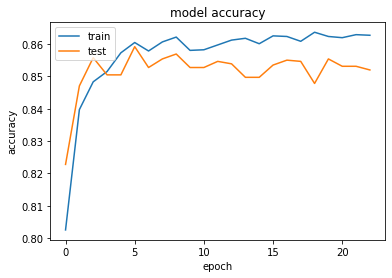

In [26]:
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

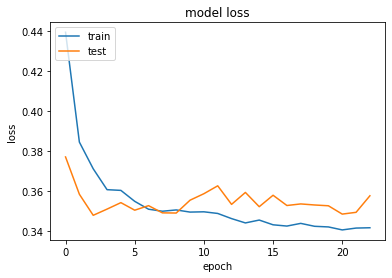

In [27]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

In [28]:
# Making the predictions and evaluating the model
y_pred = classifier.predict(X_test)
y_pred = (y_pred >= 0.5)

In [29]:
# make the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1530,   55],
       [ 214,  201]])

In [30]:
# accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)
score

0.8655

In [31]:
#get the weights
classifier.get_weights()

[array([[-0.19703867,  0.3527227 ,  0.23877257, -0.61298764,  0.04664292,
         -0.17234397,  0.81817454, -0.05162612, -0.4751429 ,  0.63682353,
         -0.24164812],
        [ 0.7788232 ,  0.43853727, -3.3699505 , -1.7460536 ,  2.190254  ,
         -2.4233134 ,  0.23574707,  0.7133146 ,  1.6635517 , -0.67539483,
         -0.7992184 ],
        [-0.24501994, -1.0987382 , -0.7252866 , -0.41826335, -0.0546731 ,
          0.06270454,  0.4990191 ,  0.07596492,  0.65976405,  0.11633554,
          0.8441987 ],
        [-1.151089  ,  0.07673208,  0.6273165 ,  0.05426101,  1.5816655 ,
          0.18068138, -0.16318727,  1.2738218 , -0.03907324,  1.6122011 ,
          0.51651543],
        [-3.1544948 , -0.1318491 , -1.2436951 , -0.5832207 , -0.13461965,
          0.35193843,  0.80722326,  2.847596  , -0.44570902, -0.94952136,
          0.13397539],
        [ 0.10945846,  0.64342695,  1.0466341 ,  0.10312616,  0.6796369 ,
         -0.28822803,  0.9280469 , -0.03908995,  0.33097857, -0.5799755